In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

dataframe = pd.read_csv("accelerometer_datosTrabajo1.csv")

print(f"cantidad columnas: {len(dataframe.columns)}, cantidad filas: {len(dataframe)}")

# otra forma de realizar esta agrupación es con un metodo de la clase dataframe de pandas
dataframe.groupby(by='wconfid').describe()


cantidad columnas: 5, cantidad filas: 153000


pctid                                                        x  \
           count  mean        std   min   25%   50%   75%    max    count   
wconfid                                                                     
1        51000.0  60.0  24.495138  20.0  40.0  60.0  80.0  100.0  51000.0   
2        51000.0  60.0  24.495138  20.0  40.0  60.0  80.0  100.0  51000.0   
3        51000.0  60.0  24.495138  20.0  40.0  60.0  80.0  100.0  51000.0   

                   ...      y               z                             \
             mean  ...    75%    max    count      mean       std    min   
wconfid            ...                                                     
1        1.000087  ...  0.176  7.996  51000.0 -0.122148  0.691010 -5.867   
2        0.998190  ...  0.168  7.391  51000.0 -0.111833  0.562688 -4.305   
3        0.988589  ...  0.070  0.301  51000.0 -0.119326  0.087937 -0.582   

                                     
           25%    50%    75%    max  
wconfid                              
1       -0.266 -0.125 -0.012  4.992  
2       -0.230 -0.121  0.004  6.086  
3       -0.145 -0.125 -0.105  0.398  

[3 rows x 32 columns]

In [6]:
# magnitud de la aceleracion
dataframe['r'] = np.sqrt( dataframe.x** 2 + dataframe.y** 2 + dataframe.z** 2 )

In [7]:
# si se desea analizar correctamente hemos de separar los datos del acelerometro
set_weight_configuration = set(dataframe['wconfid']) # un set me indica los valores unicos
# conversion a lista:
set_weight_configuration = [a for a in set_weight_configuration] # permite acceder a los elementos

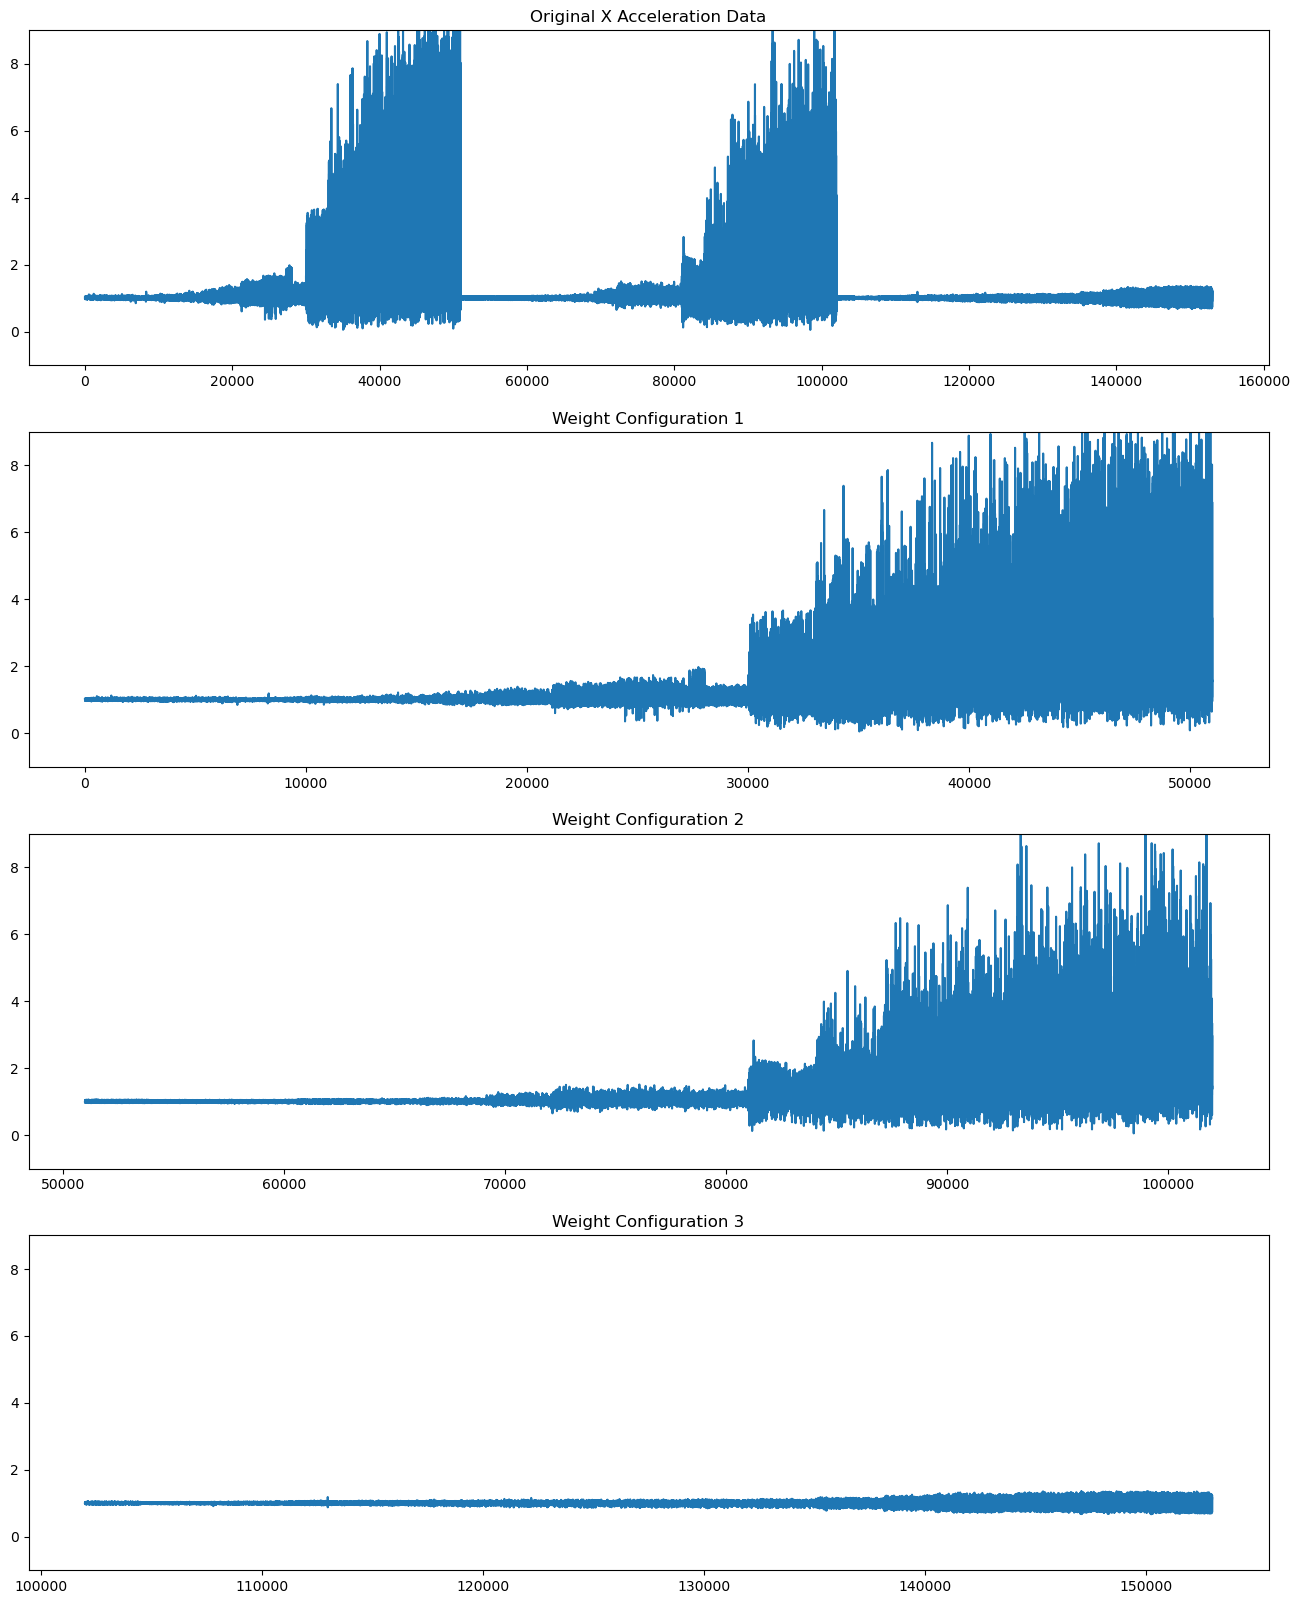

In [8]:
fig, ax = plt.subplots(1 + len(set_weight_configuration) ,1, figsize = (16,20))

ax[0].set_ylim([-1,9])
ax[0].set_title("Original X Acceleration Data")
ax[0].plot(dataframe.r)

for idx, element in enumerate(set_weight_configuration):
    ax[idx + 1].set_ylim([-1,9])
    ax[idx + 1].set_title(f"Weight Configuration {element}")
    ax[idx + 1].plot( dataframe[dataframe['wconfid'] == element].r )

### la información:
Data collection method:
17 rotation speeds were set up, ranging from 20% to 100% of the cooler maximum speed at 5% intervals; for the three weight distribution configurations in the cooler blades. Note that the Akasa AK-FN059 cooler has 1900 rpm of max rotation speed.

The vibration measurements were collected at a frequency of 20 ms for 1 min for each percentage, generating 3000 records per speed. Thus, in total, 153,000 vibration records were collected from the simulation model.

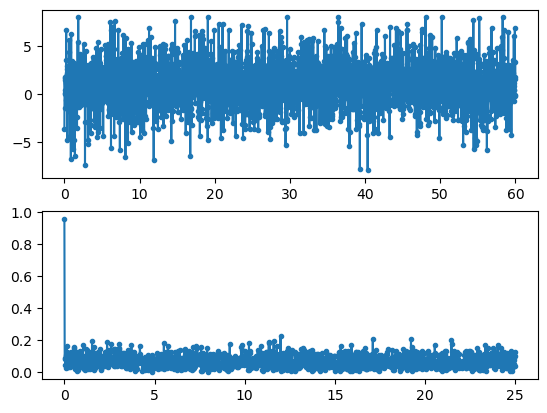

In [36]:
# first weight configutation and 100 percent of blade
data = dataframe[(dataframe['wconfid'] == 1) & (dataframe['pctid'] == 100)].x.values

tstep = 0.02 # sample time interval of 20ms
Fs = 1/tstep      # sample frequency (50 Hz)
fstep = Fs / N # frequency interval

N = int(Fs * 60) # number of samples
assert N == 3000

t = np.linspace(0, (N-1) * tstep, N) 
f = np.linspace(0, (N-1) * fstep, N)


fft_acceleration = np.fft.fft(data)
fft_mag = np.abs(fft_acceleration) / N


# dada mi maxima frecuencia puedo reconstruir hasta bajo la mitad de esta
f_plot = f[0:int(N/2+1)] #nyquist theorem
fft_mag_plot = 2 * fft_mag[0:int(N/2+1)] # cuenta por la energia de las frecuencias negativas
fft_mag_plot[0] = fft_mag_plot[0] / 2 # el primer componente solo aparece una vez, no 2


fig, ax = plt.subplots(nrows = 2, ncols=1)
ax[0].plot(t, data, '.-')
ax[1].plot(f_plot, fft_mag_plot, '.-')
plt.show()